#Important methods to be run all the time

In [1]:
!pip3 install nltk

In [2]:
def preprocess(text):
  text = text.lower()
  text = text.replace(".","")
  text = text.replace(",","")
  text = text.replace(":","")
  text = text.replace(";","")
  text = text.replace("\'","")
  text = text.replace("\"","")
  text = text.replace("?","")
  text = text.replace("/","")
  text = text.replace(">","")
  text = text.replace("<","")
  text = text.replace("+","")
  text = text.replace("=","")
  text = text.replace(")","")
  text = text.replace("(","")
  text = text.replace("]","")
  text = text.replace("[","")
  text = text.replace("}","")
  text = text.replace("{","")
  text = text.replace("*","")
  text = text.replace("&","")
  text = text.replace("^","")
  text = text.replace("%","")
  text = text.replace("$","")
  text = text.replace("#","")
  text = text.replace("@","")
  text = text.replace("!","")
  text = text.replace('“','')
  text = text.replace('’','')
  text = text.replace('”','')

  return text

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

def get_clean_text(article):
  '''
  Method to remove all puncts and stopwords from an article and return the clean article.
  '''
  #print(article)
  try:
    article = preprocess(article)
  except:
    return article
  art_words = article.split(" ")
    #print(art_words)
  clean_art_words=[]
  for word in art_words:
    #word = ''.join(filter(str.isalnum, word))
    if word not in en_stops:
      clean_art_words.append(word)
  article = " ".join(clean_art_words)
  return article

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd

# Read training data
try:
    train_df = pd.read_csv('/content/unmasked_training_data - Sheet1.csv', encoding='utf-8')
    print("Training data loaded successfully")
    train_df.head()
except pd.errors.ParseError as e:
    print(f"Error reading training.csv: {e}")

# Read testing data
try:
    test_df = pd.read_csv('/content/unmasked_originaltest_data - Sheet1.csv', encoding='utf-8')
    print("Testing data loaded successfully")
    test_df.head()
except pd.errors.ParseError as e:
    print(f"Error reading testing.csv: {e}")


Training data loaded successfully
Testing data loaded successfully


In [5]:
df = train_df # Or df = test_df, depending on which dataframe you want to inspect
df.head()

,text,labels
0,"* Just think * Why are these ""war victims"" so ...",1
1,Ever noticed how quickly they learn the comple...,1
2,"If they truly fled poverty, why do so many arr...",1
3,"We are told they are desperate, but their jour...",1
4,"They claim to be persecuted, yet they are the ...",1


In [6]:
def preprocess(df):
    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()
    df = df.dropna(subset=["text", "labels"])
    df["text"] = df["text"].astype(str)
    df["text"] = df["text"].apply(get_clean_text)
    return df

train_df = preprocess(train_df)
test_df  = preprocess(test_df)

In [7]:
# Fit label mapping ONLY on training data
label2id = {label: idx for idx, label in enumerate(train_df["labels"].unique())}
id2label = {v: k for k, v in label2id.items()}

#Load the saved df and run from here

In [8]:
#df.to_csv(path+"final_data_200K.csv")
import pickle

In [9]:
!pip3 install transformers

In [10]:
len(df['text'][0])

140

In [11]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

#example_text = 'I will watch Memento tonight'
#bert_input = tokenizer(example_text,padding='max_length', max_length = 10,truncation=True, return_tensors="pt")


#print(bert_input['input_ids'])
#print(bert_input['token_type_ids'])
#print(bert_input['attention_mask'])
#example_text = tokenizer.decode(bert_input.input_ids[0])

#print(example_text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [12]:
import pandas as pd
import os

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#df = df_samp
df = df.dropna()
#df[["headline","category"]].astype(str)

df["text"] = df["text"].apply(lambda x: get_clean_text(x))

In [15]:
df.head()

,text,labels
0,"* Just think * Why are these ""war victims"" so ...",1
1,Ever noticed how quickly they learn the comple...,1
2,"If they truly fled poverty, why do so many arr...",1
3,"We are told they are desperate, but their jour...",1
4,"They claim to be persecuted, yet they are the ...",1


In [16]:
def get_majority_label(text):
    text = str(text)
    text_l = text.split(',')
    from collections import Counter
    c = Counter(text_l)
    return c.most_common()[0][0]

df["major_label"]=df["labels"].apply(lambda x: get_majority_label(x))

In [17]:
df.head()

,text,labels,major_label
0,"* Just think * Why are these ""war victims"" so ...",1,1
1,Ever noticed how quickly they learn the comple...,1,1
2,"If they truly fled poverty, why do so many arr...",1,1
3,"We are told they are desperate, but their jour...",1,1
4,"They claim to be persecuted, yet they are the ...",1,1


In [18]:
df.major_label.value_counts()

,count
major_label,
2b3b,300
1,297
2a3b,287
2a,286
2a3a,278
2b,248
2b3a,228
Other,123
Other,77


# Contrastive Learning

In [19]:
import pandas as pd
df_final2 = df

In [20]:
df_final2.head()

,text,labels,major_label
0,"* Just think * Why are these ""war victims"" so ...",1,1
1,Ever noticed how quickly they learn the comple...,1,1
2,"If they truly fled poverty, why do so many arr...",1,1
3,"We are told they are desperate, but their jour...",1,1
4,"They claim to be persecuted, yet they are the ...",1,1


In [21]:
import pandas as pd
df = df_final2
df.fillna('Normal', inplace=True)

#df = df[df['label'] != '2a3b']  #Remove label with only one row

In [22]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [23]:
df.head()

,text,labels,major_label
0,"* Just think * Why are these ""war victims"" so ...",1,1
1,Ever noticed how quickly they learn the comple...,1,1
2,"If they truly fled poverty, why do so many arr...",1,1
3,"We are told they are desperate, but their jour...",1,1
4,"They claim to be persecuted, yet they are the ...",1,1


In [24]:
df.major_label.value_counts()

,count
major_label,
2b3b,300
1,297
2a3b,287
2a,286
2a3a,278
2b,248
2b3a,228
Other,123
Other,77


In [25]:
df.head()

,text,labels,major_label
0,"* Just think * Why are these ""war victims"" so ...",1,1
1,Ever noticed how quickly they learn the comple...,1,1
2,"If they truly fled poverty, why do so many arr...",1,1
3,"We are told they are desperate, but their jour...",1,1
4,"They claim to be persecuted, yet they are the ...",1,1


In [26]:
# fixed_pipeline.py
import random
import json
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, DataCollatorWithPadding
from torch.utils.data import Dataset, DataLoader

# ---------------------------
# 0) seeds for reproducibility
# ---------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ---------------------------
# 1) normalize labels (CRITICAL)
# ---------------------------
df['labels'] = df['labels'].astype(str).str.strip()

# ---------------------------
# 2) label mapping & encoder
# ---------------------------
unique_labels = sorted(df['labels'].unique())
label_mapping = {lab: i for i, lab in enumerate(unique_labels)}

def encode_labels(labels):
    """labels: list of strings"""
    return [label_mapping[l.strip()] for l in labels]

# ---------------------------
# 3) 3-way split: pretrain / trainval / test
# ---------------------------
texts = df['text'].tolist()
labels = df['labels'].tolist()


# ensure df has a stable integer index 0..N-1
df = df.reset_index(drop=True)

# use indices to split
indices = np.arange(len(df))

# first split indices: pretrain vs rest
pretrain_idx, rest_idx = train_test_split(indices, test_size=0.4, stratify=df['labels'], random_state=SEED)

# second split: rest -> trainval vs test
trainval_idx, test_idx = train_test_split(rest_idx, test_size=0.5, stratify=df.loc[rest_idx, 'labels'], random_state=SEED)

# optional: split trainval -> train / val for single-run
train_idx, val_idx = train_test_split(trainval_idx, test_size=0.2, stratify=df.loc[trainval_idx, 'labels'], random_state=SEED)

# build lists from indices
pretrain_texts = df.loc[pretrain_idx, 'text'].tolist()
pretrain_labels = df.loc[pretrain_idx, 'labels'].tolist()

train_texts = df.loc[train_idx, 'text'].tolist()
train_labels = df.loc[train_idx, 'labels'].tolist()

val_texts = df.loc[val_idx, 'text'].tolist()
val_labels = df.loc[val_idx, 'labels'].tolist()

test_texts = df.loc[test_idx, 'text'].tolist()
test_labels = df.loc[test_idx, 'labels'].tolist()

# sanity checks by index (guaranteed non-overlap)
assert set(pretrain_idx).isdisjoint(set(train_idx))
assert set(pretrain_idx).isdisjoint(set(val_idx))
assert set(pretrain_idx).isdisjoint(set(test_idx))
assert set(train_idx).isdisjoint(set(test_idx))
assert set(val_idx).isdisjoint(set(test_idx))
print("Index-based split: all sets mutually exclusive by row index.")


# ---------------------------
# 5) encode labels
# ---------------------------
train_labels_encoded = encode_labels(train_labels)
val_labels_encoded   = encode_labels(val_labels)
test_labels_encoded  = encode_labels(test_labels)
pretrain_labels_encoded = encode_labels(pretrain_labels)  # useful if you use a sampler for pretrain

# ---------------------------
# 6) tokenizer + collator
# ---------------------------
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
data_collator = DataCollatorWithPadding(tokenizer)  # pads per-batch in DataLoader

def tokenize_function(texts):
    # do NOT use return_tensors here; let the collator create tensors per-batch
    return tokenizer(texts, padding=False, truncation=True, max_length=128)

# Tokenize (raw dict outputs)
pretrain_encodings = tokenize_function(pretrain_texts)
train_encodings    = tokenize_function(train_texts)
val_encodings      = tokenize_function(val_texts)
test_encodings     = tokenize_function(test_texts)

# ---------------------------
# 7) Dataset definition
# ---------------------------
class ContrastiveDataset(Dataset):
    def __init__(self, encodings, labels):
        """
        encodings: tokenizer(...) dict (lists of input_ids, attention_mask, ...)
        labels: list of ints (already encoded)
        """
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {}
        for k, v in self.encodings.items():
            # if tokenizer returned lists (typical), convert that element to a tensor
            if isinstance(v, torch.Tensor):
                item[k] = v[idx]
            else:
                item[k] = torch.tensor(v[idx], dtype=torch.long)
        item['labels'] = self.labels[idx]
        return item

# ---------------------------
# 8) build datasets & dataloaders (NO LEAKAGE)
# ---------------------------
BATCH_SIZE_PRETRAIN = 32
BATCH_SIZE_TRAIN = 16
BATCH_SIZE_EVAL = 32

# Contrastive datasets (training only)
pretrain_dataset = ContrastiveDataset(pretrain_encodings, pretrain_labels_encoded)
train_dataset    = ContrastiveDataset(train_encodings, train_labels_encoded)

# Non-contrastive datasets (evaluation only)
val_dataset  = ContrastiveDataset(val_encodings,  val_labels_encoded)
test_dataset = ContrastiveDataset(test_encodings, test_labels_encoded)

pretrain_loader = DataLoader(
    pretrain_dataset,
    batch_size=BATCH_SIZE_PRETRAIN,
    shuffle=True,
    collate_fn=data_collator
)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE_TRAIN,
    shuffle=True,
    collate_fn=data_collator
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE_EVAL,
    shuffle=False,
    collate_fn=data_collator
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE_EVAL,
    shuffle=False,
    collate_fn=data_collator
)

print(
    f"Loaders: pretrain={len(pretrain_loader)} "
    f"train={len(train_loader)} "
    f"val={len(val_loader)} "
    f"test={len(test_loader)}"
)


Index-based split: all sets mutually exclusive by row index.
Loaders: pretrain=40 train=22 val=3 test=14


In [27]:
# ---------------------------
# Dataset sizes (UNCHANGED)
# ---------------------------
print(
    "Sizes:",
    "pretrain", len(pretrain_dataset),
    "train", len(train_dataset),
    "val", len(val_dataset),
    "test", len(test_dataset)
)

# ---------------------------
# Label distributions (SAFE)
# ---------------------------
from collections import Counter

print("pretrain label dist (encoded):", Counter(pretrain_labels_encoded))
print("train label dist (encoded):",    Counter(train_labels_encoded))
print("val label dist (encoded):",      Counter(val_labels_encoded))
print("test label dist (encoded):",     Counter(test_labels_encoded))


Sizes: pretrain 1274 train 340 val 85 test 425
pretrain label dist (encoded): Counter({6: 180, 0: 178, 3: 172, 1: 171, 2: 167, 4: 149, 5: 137, 7: 120})
train label dist (encoded): Counter({6: 48, 0: 48, 3: 46, 1: 45, 2: 45, 4: 40, 5: 36, 7: 32})
val label dist (encoded): Counter({6: 12, 1: 12, 0: 12, 2: 11, 3: 11, 4: 10, 5: 9, 7: 8})
test label dist (encoded): Counter({6: 60, 0: 59, 1: 58, 3: 58, 2: 55, 4: 49, 5: 46, 7: 40})


In [28]:
import torch.nn.functional as F
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Sampler
import numpy as np
from transformers import AutoModel


class SupConLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(SupConLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features, labels):
        # features: [batch_size, dim]
        # labels:   [batch_size] or [batch_size, 1]
        features = F.normalize(features, dim=1)
        batch_size = features.shape[0]

        # similarity matrix: [B, B]
        sim_matrix = torch.matmul(features, features.T) / self.temperature

        # remove self-comparisons from sim_matrix
        self_mask = torch.eye(batch_size, dtype=torch.bool, device=features.device)
        sim_matrix = sim_matrix.masked_fill(self_mask, -1e9)

        # labels: [B, 1]
        labels = labels.view(-1, 1)
        # positive mask: same label -> 1, else 0
        mask_pos = torch.eq(labels, labels.T).float()

        # remove self from positive mask as well
        mask_pos = mask_pos.masked_fill(self_mask, 0.0)

        # exponentiate similarities
        exp_sim = torch.exp(sim_matrix)

        # numerator: sum over positives
        numerator = (exp_sim * mask_pos).sum(dim=1)
        # denominator: sum over all (non-self) pairs
        denominator = exp_sim.sum(dim=1)

        # anchors that have at least one positive
        valid_mask = mask_pos.sum(dim=1) > 0

        if valid_mask.sum() == 0:
            # no valid anchors in this batch (all singletons) → return 0 loss
            # (or you could return mean over all with a large penalty, but 0 is safer)
            return torch.tensor(0.0, device=features.device, requires_grad=True)

        # compute loss only over valid anchors
        num_valid = valid_mask.sum()
        frac = numerator[valid_mask] / (denominator[valid_mask] + 1e-9)
        loss = -torch.log(frac + 1e-9).sum() / num_valid
        return loss

class BalancedBatchSampler(Sampler):
    def __init__(self, labels, P, K, seed=42, shuffle=True):
        """
        labels: list/array of label ints (len = dataset size)
        P: number of distinct labels per batch
        K: number of samples per label
        shuffle: whether to shuffle labels ordering each epoch
        """
        self.labels = np.array(labels)
        self.P = int(P)
        self.K = int(K)
        self.seed = int(seed)
        self.shuffle = bool(shuffle)

        self.label2idx = {}
        for idx, lab in enumerate(self.labels):
            self.label2idx.setdefault(int(lab), []).append(idx)
        self.unique_labels = list(self.label2idx.keys())

    def __len__(self):
        total = len(self.labels)
        # number of full batches per epoch
        return max(1, total // (self.P * self.K))

    def __iter__(self):
        rng = np.random.RandomState(self.seed)
        # Optionally shuffle unique labels each epoch
        labels_pool = self.unique_labels.copy()
        if self.shuffle:
            rng.shuffle(labels_pool)

        # produce exactly __len__() batches
        for _ in range(len(self)):
            # if not enough labels to sample P distinct ones, sample with replacement
            if len(labels_pool) >= self.P:
                chosen_labels = rng.choice(labels_pool, size=self.P, replace=False)
            else:
                chosen_labels = rng.choice(labels_pool, size=self.P, replace=True)

            batch_indices = []
            for lab in chosen_labels:
                idx_list = self.label2idx[lab]
                if len(idx_list) >= self.K:
                    chosen = rng.choice(idx_list, size=self.K, replace=False)
                else:
                    chosen = rng.choice(idx_list, size=self.K, replace=True)
                batch_indices.extend(chosen.tolist())

            yield batch_indices

    def set_epoch(self, epoch):
        # optional: change seed per epoch to vary randomness
        self.seed = int(self.seed) + int(epoch)

    def __len__(self):
        total = len(self.labels)
        return total // (self.P * self.K)

class ContrastiveModel(nn.Module):
    def __init__(self, model_name="bert-base-uncased", hidden_dim=768, output_dim=128):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        self.projection = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        # token_type_ids may be None (AutoModel accepts None)
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_emb = outputs.last_hidden_state[:, 0]   # [B, hidden_dim]
        return self.projection(cls_emb)             # [B, output_dim]


class EarlyStoppingObj:
    def __init__(self, patience=5, min_delta=0.0, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.best_state = None
        self.early_stop = False

    def step(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}
            if self.verbose:
                print(f"  Initial best loss: {self.best_loss:.6f}")
            return
        if val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f"  EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose: print("  Early stopping triggered.")
        else:
            if self.verbose:
                print(f"  Val loss improved: {self.best_loss:.6f} -> {val_loss:.6f}")
            self.best_loss = val_loss
            self.best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}
            self.counter = 0

    def load_best(self, model):
        if self.best_state is not None:
            model.load_state_dict({k:v.to(next(model.parameters()).device) for k,v in self.best_state.items()})


In [29]:
P = 8   # tunable
K = 4
sampler = BalancedBatchSampler(pretrain_labels_encoded, P=P, K=K, seed=SEED, shuffle=True)
pretrain_loader = DataLoader(pretrain_dataset, batch_sampler=sampler, collate_fn=data_collator, num_workers=2, pin_memory=True)

val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, collate_fn=data_collator)

proj_dim = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device
model = ContrastiveModel(output_dim=proj_dim).to(device)
contrastive_loss = SupConLoss(temperature=0.07).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

early_stopper = EarlyStoppingObj(patience=5, min_delta=0.001, verbose=True)

# ---------- Training loop (contrastive pretraining) ----------
max_epochs = 50
pretrain_steps_per_epoch = len(pretrain_loader)  # __len__ from sampler
print(f'using {device}')

for epoch in range(1, max_epochs+1):
    model.train()
    total_loss = 0.0
    for step, batch_indices in enumerate(pretrain_loader):
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch_indices.items() if k != 'labels'}
        labels = batch_indices['labels'].to(device)

        features = model(**batch)  # [B, proj_dim]
        loss = contrastive_loss(features, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / pretrain_steps_per_epoch
    print(f"Epoch {epoch:02d}  Pretrain Loss: {avg_train_loss:.6f}")

    # ---------- Validation (contrastive) ----------
    model.eval()
    val_loss_total = 0.0
    with torch.no_grad():
        for batch in val_loader:
            batch_inputs = {k: v.to(device) for k,v in batch.items() if k != 'labels'}
            vlabels = batch['labels'].to(device)
            vfeat = model(**batch_inputs)
            vloss = contrastive_loss(vfeat, vlabels)
            val_loss_total += vloss.item()
    avg_val_loss = val_loss_total / max(1, len(val_loader))
    print(f"  Val Loss: {avg_val_loss:.6f}")

    #early stopping step with saved best state
    early_stopper.step(avg_val_loss, model)
    if early_stopper.early_stop:
        print(f"Stopping early at epoch {epoch}")
        break

# load best model (encoder + proj) after training
early_stopper.load_best(model)
torch.save(model.state_dict(), "best_contrastive_model.pt")
print("Saved best contrastive model -> best_contrastive_model.pt")


using cuda
Epoch 01  Pretrain Loss: 0.587891
  Val Loss: 0.376203
  Initial best loss: 0.376203
Epoch 02  Pretrain Loss: 0.064105
  Val Loss: 0.193768
  Val loss improved: 0.376203 -> 0.193768
Epoch 03  Pretrain Loss: 0.016950
  Val Loss: 0.193958
  EarlyStopping counter: 1/5
Epoch 04  Pretrain Loss: 0.004321
  Val Loss: 0.160305
  Val loss improved: 0.193768 -> 0.160305
Epoch 05  Pretrain Loss: 0.001311
  Val Loss: 0.178102
  EarlyStopping counter: 1/5
Epoch 06  Pretrain Loss: 0.000626
  Val Loss: 0.176155
  EarlyStopping counter: 2/5
Epoch 07  Pretrain Loss: 0.000390
  Val Loss: 0.174881
  EarlyStopping counter: 3/5
Epoch 08  Pretrain Loss: 0.000373
  Val Loss: 0.174147
  EarlyStopping counter: 4/5
Epoch 09  Pretrain Loss: 0.000280
  Val Loss: 0.175946
  EarlyStopping counter: 5/5
  Early stopping triggered.
Stopping early at epoch 9
Saved best contrastive model -> best_contrastive_model.pt


In [30]:
# Fine Tuning the model on training data again: Earlier, using Contrastive loss, we brought similar data points
# together in terms of their representation, and different data points far apart. Now here, we train the same model
# (fine tune it) on the classification task using Cross Entropy loss. This makes sure that the weights now also take
# into consideration that labels of each data point.

from sklearn.metrics import classification_report, confusion_matrix, f1_score


class Classifier(nn.Module):
    def __init__(self, contrastive_model, num_classes, freeze_encoder=False):
        super().__init__()
        # Use a fresh encoder reference to avoid accidental projection usage
        self.encoder = contrastive_model.encoder
        self.fc = nn.Linear(768, num_classes)
        if freeze_encoder:
            for p in self.encoder.parameters():
                p.requires_grad = False

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_embedding = outputs.last_hidden_state[:, 0]
        return self.fc(cls_embedding)


# Initialize classifier model
num_classes = len(label_mapping)
classifier = Classifier(model, num_classes=num_classes, freeze_encoder=False).to(device)

counter = Counter(train_labels)  # train_labels are strings, ordered as unique_labels
freqs = np.array([counter.get(lbl, 0) for lbl in unique_labels], dtype=float)
# avoid zeros
freqs = np.where(freqs == 0, 1.0, freqs)
inv_freq = 1.0 / freqs
class_weights = torch.tensor(inv_freq / inv_freq.sum() * len(unique_labels), dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.AdamW(classifier.parameters(), lr=5e-5, weight_decay=0.01)

#✅ Early stopping instance for classification training
class EarlyStopSaver:
    def __init__(self, patience=5, min_delta=0.0, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.best_state = None
        self.early_stop = False

    def step(self, val_loss, model):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            if self.verbose and (self.best_loss is not None):
                print(f"  Val loss improved {self.best_loss:.6f} -> {val_loss:.6f}")
            self.best_loss = val_loss
            self.best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"  No improvement. Counter {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def load_best(self, model):
        if self.best_state is not None:
            model.load_state_dict({k:v.to(next(model.parameters()).device) for k,v in self.best_state.items()})

cls_early = EarlyStopSaver(patience=5, min_delta=0.001, verbose=True)


# Fine-tuning loop (classification)
max_epochs = 50
for epoch in range(1, max_epochs+1):
    classifier.train()
    train_loss = 0.0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)

        logits = classifier(**inputs)
        loss = criterion(logits, labels)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(classifier.parameters(), max_norm=1.0)  # optional
        optimizer.step()
        # if scheduler: scheduler.step()

        train_loss += loss.item() * labels.size(0)

    avg_train_loss = train_loss / len(train_dataset)  # use dataset size for true average
    print(f"Epoch {epoch}  Train loss: {avg_train_loss:.6f}")

    # ---------- Validation ----------
    classifier.eval()
    val_loss = 0.0
    all_preds = []
    all_trues = []
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            logits = classifier(**inputs)
            loss = criterion(logits, labels)
            val_loss += loss.item() * labels.size(0)

            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy().tolist())
            all_trues.extend(labels.cpu().numpy().tolist())

    avg_val_loss = val_loss / len(val_dataset)
    print(f"Epoch {epoch}  Val loss: {avg_val_loss:.6f}")
    # optional: print performance summary per epoch
    # print(classification_report(all_trues, all_preds, target_names=unique_labels, digits=4))

    # step early stopper on validation loss and save best classifier state
    cls_early.step(avg_val_loss, classifier)
    if cls_early.early_stop:
        print(f"Early stopping triggered at epoch {epoch}")
        break

# load best classifier weights
cls_early.load_best(classifier)

# save classifier checkpoint
torch.save({
    "classifier_state_dict": classifier.state_dict(),
    "label_mapping": label_mapping,
}, "classifier_model.pt")
print("Saved classifier model to classifier_model.pt")

# ---------- Final evaluation on test set (only once) ----------
classifier.eval()
all_preds = []
all_trues = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)
        logits = classifier(**inputs)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy().tolist())
        all_trues.extend(labels.cpu().numpy().tolist())

print("Test classification report:")
print(classification_report(all_trues, all_preds, target_names=unique_labels, digits=4))
print("Confusion matrix:\n", confusion_matrix(all_trues, all_preds))


Epoch 1  Train loss: 1.010300
Epoch 1  Val loss: 0.310586
Epoch 2  Train loss: 0.112055
Epoch 2  Val loss: 0.205614
  Val loss improved 0.310586 -> 0.205614
Epoch 3  Train loss: 0.028695
Epoch 3  Val loss: 0.225620
  No improvement. Counter 1/5
Epoch 4  Train loss: 0.003814
Epoch 4  Val loss: 0.208909
  No improvement. Counter 2/5
Epoch 5  Train loss: 0.002182
Epoch 5  Val loss: 0.206561
  No improvement. Counter 3/5
Epoch 6  Train loss: 0.001521
Epoch 6  Val loss: 0.238339
  No improvement. Counter 4/5
Epoch 7  Train loss: 0.001241
Epoch 7  Val loss: 0.231951
  No improvement. Counter 5/5
Early stopping triggered at epoch 7
Saved classifier model to classifier_model.pt
Test classification report:
              precision    recall  f1-score   support

           1     0.9828    0.9661    0.9744        59
          2a     0.9815    0.9138    0.9464        58
        2a3a     0.9811    0.9455    0.9630        55
        2a3b     0.9655    0.9655    0.9655        58
          2b     0.921

In [31]:
!pip3 install transformers

In [32]:
import json
from sklearn.model_selection import KFold
from transformers import AutoTokenizer, DataCollatorWithPadding
from torch.optim import AdamW
from torch.utils.data import DataLoader
import torch
from sklearn.metrics import f1_score

# ---- IMPORTANT: run KFold on trainval only (not on df) ----
trainval_texts = df.loc[trainval_idx, 'text'].tolist()
trainval_labels = df.loc[trainval_idx, 'labels'].tolist()
all_texts = trainval_texts            # <-- use trainval split from earlier 3-way split
all_labels = trainval_labels
all_labels_encoded = encode_labels(all_labels)

# KFold config
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
data_collator = DataCollatorWithPadding(tokenizer)

fold_results = []
results_file = "kfold_results.json"

# ---- Save pretrained encoder state once (from the contrastive model you pre-trained earlier)
# Make sure `model` is the contrastive model trained only on pretrain_dataset.
pretrained_encoder_state = {k: v.cpu().clone() for k, v in model.encoder.state_dict().items()}

# Projection / hidden dims used when creating a fresh ContrastiveModel per fold.
# Ensure proj_dim matches what you used in pretraining (embedding dim of projection head).
proj_dim = 128

# Early stopping parameters for KFold
patience = 5  # Number of epochs to wait for improvement
min_delta = 0.001  # Minimum change to qualify as improvement

for fold, (train_index, val_index) in enumerate(kf.split(all_texts)):
    print(f"\n{'='*50}")
    print(f"--- Fold {fold+1}/{n_splits} ---")
    print(f"{'='*50}")

    # Build fold-specific text/labels
    train_texts_fold = [all_texts[i] for i in train_index]
    val_texts_fold   = [all_texts[i] for i in val_index]
    train_labels_fold = [all_labels_encoded[i] for i in train_index]
    val_labels_fold   = [all_labels_encoded[i] for i in val_index]

    # Tokenize WITHOUT return_tensors
    train_encodings_fold = tokenizer(train_texts_fold, padding=False, truncation=True, max_length=128)
    val_encodings_fold   = tokenizer(val_texts_fold,   padding=False, truncation=True, max_length=128)

    # Datasets (reuse your ContrastiveDataset)
    train_dataset_fold = ContrastiveDataset(train_encodings_fold, train_labels_fold)
    val_dataset_fold   = ContrastiveDataset(val_encodings_fold,   val_labels_fold)

    # DataLoaders with collate_fn
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=16, shuffle=True, collate_fn=data_collator, num_workers=2, pin_memory=True)
    val_loader_fold   = DataLoader(val_dataset_fold,   batch_size=32, shuffle=False, collate_fn=data_collator, num_workers=2, pin_memory=True)

    # Create a FRESH contrastive model for this fold and load the pretrained encoder state
    fresh_contrastive = ContrastiveModel(model_name="bert-base-uncased", hidden_dim=768, output_dim=proj_dim)
    fresh_contrastive.encoder.load_state_dict(pretrained_encoder_state)
    fresh_contrastive.to(device)

    # Initialize a fresh classifier for this fold using the fresh_contrastive encoder
    classifier = Classifier(fresh_contrastive, num_classes=len(label_mapping)).to(device)

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = AdamW(classifier.parameters(), lr=5e-5)

    # Early stopping per fold
    cls_early = EarlyStopSaver(patience=patience, min_delta=min_delta, verbose=True)

    # Fine-tune for this fold
    max_epochs = 50
    for epoch in range(max_epochs):
        # training
        classifier.train()
        total_loss = 0.0
        for batch in train_loader_fold:
            optimizer.zero_grad()
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            logits = classifier(**inputs)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / max(1, len(train_loader_fold))

        # validation
        classifier.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for batch in val_loader_fold:
                inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
                labels = batch['labels'].to(device)
                logits = classifier(**inputs)
                val_loss_total += criterion(logits, labels).item()
        avg_val_loss = val_loss_total / max(1, len(val_loader_fold))

        print(f"  Epoch {epoch+1}/{max_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        cls_early.step(avg_val_loss, classifier)

        if cls_early.early_stop:
          print(f"  Stopping early at epoch {epoch+1}")
          break

    # # Load best model (from this fold) and evaluate
    cls_early.load_best(classifier)
    print(f"  Loaded best model with loss: {cls_early.best_loss:.4f}")

    classifier.eval()
    total_acc = 0
    total_loss_val_fold = 0.0
    all_preds = []
    all_trues = []
    with torch.no_grad():
        for batch in val_loader_fold:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            logits = classifier(**inputs)
            preds = torch.argmax(logits, dim=1)
            total_acc += (preds == labels).sum().item()
            total_loss_val_fold += criterion(logits, labels).item()
            all_preds.extend(preds.cpu().numpy())
            all_trues.extend(labels.cpu().numpy())

    acc_fold = total_acc / len(val_dataset_fold)
    avg_loss_fold = total_loss_val_fold / max(1, len(val_loader_fold))
    fold_macro_f1 = f1_score(all_trues, all_preds, average='macro')
    print(f"  Fold {fold+1} Results: Acc={acc_fold:.4f}, Loss={avg_loss_fold:.4f}, Macro-F1={fold_macro_f1:.4f}")

    fold_results.append({
        'fold': fold+1,
        'accuracy': acc_fold,
        'loss': avg_loss_fold,
        'best_loss': cls_early.best_loss,
        'macro_f1': float(fold_macro_f1)
    })

    # save incremental results
    with open(results_file, "w") as f:
        json.dump(fold_results, f, indent=2)
    print(f"Saved results after Fold {fold+1}")

# summarize
avg_acc = sum(r['accuracy'] for r in fold_results) / len(fold_results)
avg_loss = sum(r['loss'] for r in fold_results) / len(fold_results)
avg_macro = sum(r['macro_f1'] for r in fold_results) / len(fold_results)
print("KFold done. Avg Acc:", avg_acc, "Avg Loss:", avg_loss, "Avg Macro-F1:", avg_macro)



--- Fold 1/10 ---
  Epoch 1/50 - Train Loss: 0.4485, Val Loss: 0.0767
  Epoch 2/50 - Train Loss: 0.0468, Val Loss: 0.0762
  No improvement. Counter 1/5
  Epoch 3/50 - Train Loss: 0.0292, Val Loss: 0.0056
  Val loss improved 0.076734 -> 0.005552
  Epoch 4/50 - Train Loss: 0.0073, Val Loss: 0.0069
  No improvement. Counter 1/5
  Epoch 5/50 - Train Loss: 0.0049, Val Loss: 0.0059
  No improvement. Counter 2/5
  Epoch 6/50 - Train Loss: 0.0037, Val Loss: 0.0039
  Val loss improved 0.005552 -> 0.003933
  Epoch 7/50 - Train Loss: 0.0032, Val Loss: 0.0026
  Val loss improved 0.003933 -> 0.002634
  Epoch 8/50 - Train Loss: 0.0027, Val Loss: 0.0023
  No improvement. Counter 1/5
  Epoch 9/50 - Train Loss: 0.0024, Val Loss: 0.0020
  No improvement. Counter 2/5
  Epoch 10/50 - Train Loss: 0.0021, Val Loss: 0.0018
  No improvement. Counter 3/5
  Epoch 11/50 - Train Loss: 0.0019, Val Loss: 0.0016
  Val loss improved 0.002634 -> 0.001586
  Epoch 12/50 - Train Loss: 0.0017, Val Loss: 0.0015
  No impro

Test Accuracy: 0.9647, Macro-F1: 0.9655
              precision    recall  f1-score   support

           1     0.9831    0.9831    0.9831        59
          2a     0.9649    0.9483    0.9565        58
        2a3a     0.9821    1.0000    0.9910        55
        2a3b     1.0000    0.9483    0.9735        58
          2b     0.9375    0.9184    0.9278        49
        2b3a     0.9565    0.9565    0.9565        46
        2b3b     0.9062    0.9667    0.9355        60
       Other     1.0000    1.0000    1.0000        40

    accuracy                         0.9647       425
   macro avg     0.9663    0.9651    0.9655       425
weighted avg     0.9654    0.9647    0.9648       425



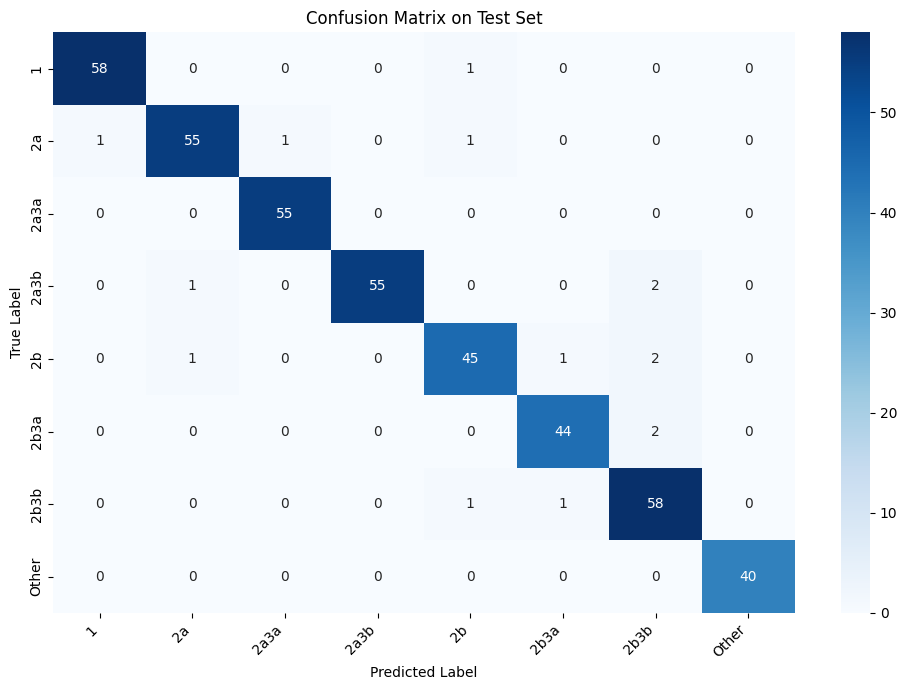

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 3) Encode test labels using TRAIN-FIT mapping
test_labels_encoded = [label_mapping[lbl] for lbl in test_labels if lbl in label_mapping]

# Filter test_texts accordingly (in case of unseen labels)
test_texts_filtered = [
    txt for txt, lbl in zip(test_texts, test_labels)
    if lbl in label_mapping
]

# Tokenize test texts for ContrastiveDataset
test_encodings_filtered = tokenize_function(test_texts_filtered)

# 4) Build ContrastiveDataset (as ClassificationDataset is not defined)
test_dataset = ContrastiveDataset(
    encodings=test_encodings_filtered,
    labels=test_labels_encoded
)

test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False,
    collate_fn=data_collator,
    num_workers=0,
    pin_memory=True
)

# 5) Evaluate
classifier.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        true_labels = batch['labels'].to(device)

        logits = classifier(**inputs)
        preds = torch.argmax(logits, dim=1)

        all_predictions.extend(preds.cpu().numpy())
        all_true_labels.extend(true_labels.cpu().numpy())

# 6) Metrics
accuracy = accuracy_score(all_true_labels, all_predictions)
macro_f1 = f1_score(all_true_labels, all_predictions, average='macro')
print(f"Test Accuracy: {accuracy:.4f}, Macro-F1: {macro_f1:.4f}")

# Label names
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
unique_labels_in_test = sorted(set(all_true_labels))
target_names = [inverse_label_mapping[i] for i in unique_labels_in_test]

print(
    classification_report(
        all_true_labels,
        all_predictions,
        labels=unique_labels_in_test,
        target_names=target_names,
        digits=4
    )
)

# Confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions, labels=unique_labels_in_test)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test Set")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()